# Python

[Centrale Lille, G3 SDIA | M1 DS, University of Lille]

---

## Lab 3 - Brownian motion, Fourier transform

---


## Guidelines (read carefully before starting)


**Objectives**: acquire further practice with common libraries and algorithms (`numpy.fft`, `matplotlib`, `seaborn`).

**Guidelines**: after retrieving the resources for the lab on moodle:
- place the `.zip` archive in a local folder (Computer -> Documents/Python/);
- unzip the archive `.zip`;
- rename the folder with the convention `lab3_Name1_Name2`;
- duplicate the notebook file and rename it `lab3_Name1_Name2.ipynb`;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab3` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab3 --file=requirement.txt --channel conda-forge
    conda activate lab3
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab3
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab3`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; global grade from F to A (A+)

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. Any code produced should be commented whenever appropriate, custom functions and objects documented and unit-tested (see session 1). Figure produced should be clearly annotated (axis, title, legend whenever appropriate).

1. Numerical correctness
2. Implementation clarity (documentation, relevance of the comments)
3. Unit-tests developed whenever appropriate (correctness, relevance)
4. Answers to the questions and overall presentation of the Jupyter notebook.

**Useful references for this lab**:

[1] `numpy.random`: [documentation](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random) 

[2] `numpy.fft`: [documentation](https://numpy.org/doc/stable/reference/routines.fft.html?highlight=fft#module-numpy.fft)

[3] `seaborn`: [tutorial/documentation](https://seaborn.pydata.org/tutorial.html#)

[4] `pandas`: [documentation](https://pandas.pydata.org/docs/reference/index.html)

[5] `matplotlib`: [documentation](https://matplotlib.org/contents.html)


## <a name="content">Contents</a>
- [Exercise 1: Titanic data handling](#ex1)
- [Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution](#ex2)
---

In [2]:
%load_ext autoreload
%autoreload 2

## <a name="ex1">Exercise 1: Titanic data handling</a> [(&#8593;)](#content)

Welcome to this data cleaning exercise with the Titanic dataset. Data cleaning is a crucial step in data analysis, involving tasks like handling missing values, adjusting data types, and preparing data for analysis.

In this exercise, we'll use Python and Pandas to clean the Titanic dataset, which contains passenger information. The goal is to get the data ready for analysis by addressing data quality issues.

You'll go through tasks like identifying and handling missing values, selecting relevant columns, converting data types, handling categorical data, and performing basic data exploration using Matplotlib and seaborn.

Let's begin by importing the dataset and taking a first look at the data.

### 1. Data import

Download the Titanic dataset from [this link](https://github.com/datasciencedojo/datasets/blob/master/titanic.csv) file into a Pandas DataFrame.
Name the DataFrame descriptively.

Your answers(s)

In [56]:
import pandas as pd
from pandas import DataFrame
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
Titanic = DataFrame(pd.read_csv('./data/titanic.csv'))
display(Titanic)
print(Titanic.info())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Initial Data Overview:

- Display the first five rows of the DataFrame using `head()`.
- Check for missing values in each column, display the number of missing values in each column as a percentage.
- Inspect data types using dtypes, and convert data types where needed.
- Identify categorical columns, and encode them using pd.get_dummies().

Your answers(s)

In [4]:
# Q1
display(Titanic.head(5))

#Q2
nas=Titanic.isna()
for label, serie in nas.items():
    print(f"column {label} has {np.sum(serie.values)/np.size(serie.values)*100}% missing values")

#Q3
print(f"\n\n{Titanic.dtypes}")
# We can replace the type of Age with Integers but first we need to handle missing values
Titanic=Titanic.fillna(0).astype({'Age':'int64'})
print(f"\n\n{Titanic.dtypes}")

#Q4
TitanicNC=pd.get_dummies(Titanic,columns=["Sex","Embarked"])



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


column PassengerId has 0.0% missing values
column Survived has 0.0% missing values
column Pclass has 0.0% missing values
column Name has 0.0% missing values
column Sex has 0.0% missing values
column Age has 19.865319865319865% missing values
column SibSp has 0.0% missing values
column Parch has 0.0% missing values
column Ticket has 0.0% missing values
column Fare has 0.0% missing values
column Cabin has 77.10437710437711% missing values
column Embarked has 0.22446689113355783% missing values


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fa

Handling Missing Values:
Develop a strategy to address missing values, considering alternatives like imputation or removal.
- Hint: Look into the `dropna()` and `fillna()` methods depending on your strategy.

In [5]:
Titanic.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


Handling Missing Values:
Develop a strategy to address missing values, considering alternatives like imputation or removal.
- Hint: Look into the `dropna()` and `fillna()` methods depending on your strategy.

Your answers(s)

In [6]:
TitanicNC.fillna(0)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,0,False,True,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,True,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,0,True,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,True,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,0,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,0,False,True,False,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,B42,True,False,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,23.4500,0,True,False,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,C148,False,True,False,True,False,False


Insights:

Look into how certain variables influence other vairables in the dataset and try to find some interesting insights.
- Hint: You can inverstigate `groupby()` and `agg()` to aggregate data, as well as `value_counts` or `pivot`..


Your answers(s)

In [ ]:
nb_males=np.sum(TitanicNC['Sex_male'])/TitanicNC.shape[0]*100
nb_females=np.sum(TitanicNC['Sex_female'])/TitanicNC.shape[0]*100
print(f"Males = {nb_males}%")
print(f"Females = {nb_females}%")

print(TitanicNC.groupby(['Sex_male','Sex_female'])['Survived'].sum())

#We found that more females survived than males
percmalesurvied=109/np.sum(TitanicNC['Sex_male'])*100
percfemalesurvied=233/np.sum(TitanicNC['Sex_female'])*100
print("{}% of males survived while {}% of females did".format(np.trunc(percmalesurvied),np.trunc(percfemalesurvied)))

TitanicNC.groupby(['Cabin'])['Survived'].sum().sort_values(ascending=False)

#The Majority of survivors were between 20 and 40 years old
print("{}% of males survived while {}% of females did \n\n {}".format(np.trunc(percmalesurvied),np.trunc(percfemalesurvied),TitanicNC.groupby(['Age'])['Survived'].sum().sort_values(ascending=False)
))

#The death rate is proportional to the class
Titanic.groupby('Pclass')['Survived'].sum()/Titanic['Pclass'].value_counts()

Males = 64.75869809203144%
Females = 35.24130190796858%
Sex_male  Sex_female
False     True          233
True      False         109
Name: Survived, dtype: int64
18.0% of males survived while 74.0% of females did
18.0% of males survived while 74.0% of females did 

 Age
0     59
24    15
22    11
35    11
27    11
      ..
64     0
66     0
70     0
71     0
74     0
Name: Survived, Length: 71, dtype: int64


Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

Visualisation
Choose appropriate plotting techniques for visualizing columns of your choosing display them.
Generate at least 4 graphs, complete with axes, titles, and legends. Feel free to add error bars, confidence intervals, differences in hue, size, and shape if appropriate.
- Hint: Pandas has a built-in plotting library that is a wrapper around matplotlib. You can learn more [here](https://pandas.pydata.org/docs/user_guide/visualization.html)

Your answers(s)

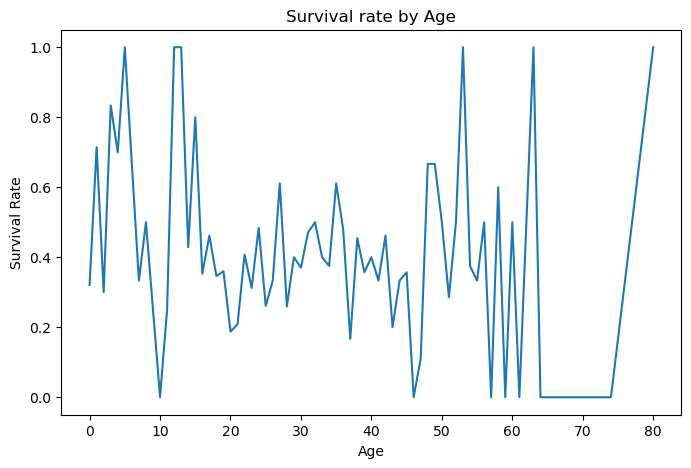

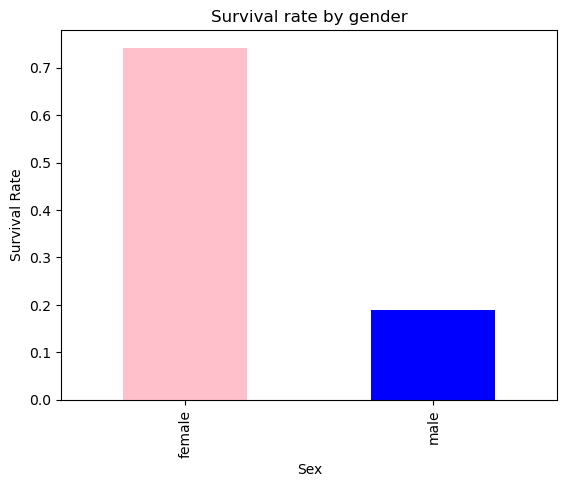

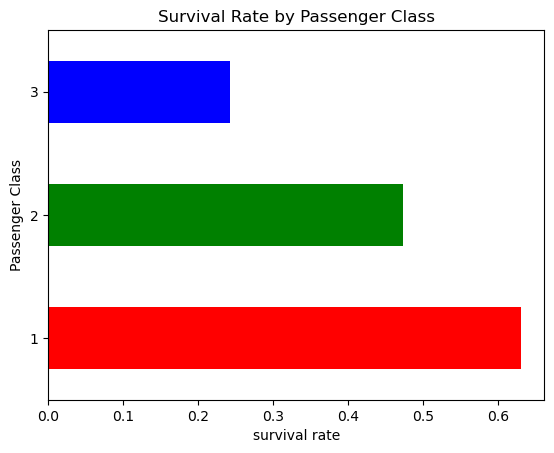

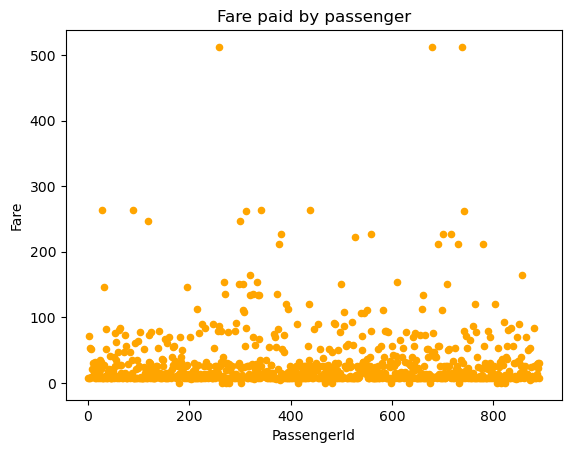

In [51]:

TitanicNC.groupby("Age")["Survived"].mean().plot(kind="line", figsize=(8,5), title="Survival rate by Age",ylabel="Survival Rate")
survBySex=Titanic.groupby(['Sex'])['Survived'].sum()
countBySex=Titanic['Sex'].value_counts()

plt.show()
(survBySex/countBySex).plot.bar(stacked=True,title="Survival rate by gender",ylabel="Survival Rate",color=['pink','blue'])

plt.show()
(Titanic.groupby('Pclass')['Survived'].sum()/Titanic['Pclass'].value_counts()).plot.barh(title="Survival Rate by Passenger Class",ylabel='Passenger Class',xlabel='survival rate',color=['red','green','blue'])

plt.show()
Titanic.plot.scatter('PassengerId','Fare',color='orange',title='Fare paid by passenger')
plt.show()


**Bonus**

Write a simple classifier to predict wether a passenger survives or not. You can use the `sklearn` library to do so.

---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a> [(&#8593;)](#content)

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

Your answers(s)

[[166 162 166 ... 135 136 131]
 [166 165 167 ... 133 134 136]
 [166 163 167 ... 135 130 138]
 ...
 [138 148 149 ... 140  84  61]
 [131 139 142 ...  96  76  57]
 [156 153 156 ... 110  89   0]]


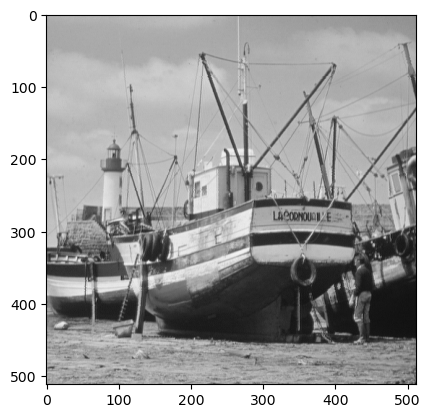

In [68]:
from PIL import Image
img=np.asarray(Image.open('./img/boat.png'))
print(img)
plt.imshow(img,cmap='grey')

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

Your answers(s)

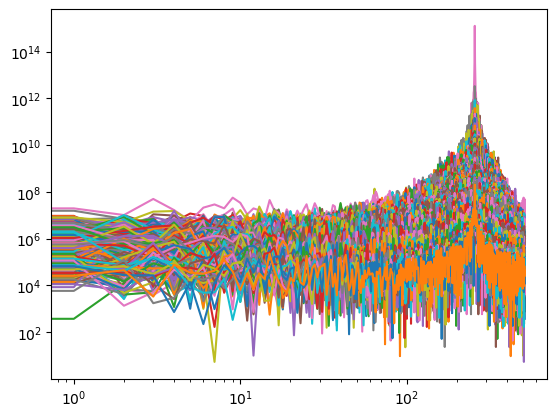

In [103]:
spectrum=np.square(np.abs(np.fft.fft2(img)))

plt.loglog(np.fft.fftshift(spectrum))
# plt.plot(spectrum)
# plt.xscale('log')
# plt.yscale('log')

plt.show()

3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

Your answers(s)

In [ ]:
def ideal_lowpass_filter(fcy,fcx):
  

**Bonus**


4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \bigg( \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \bigg) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform and $P_1^*$ is a cropping operator (adjoint of $P_1$). 

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis).

Your answers(s)

In [12]:
# your code